## Fitting a line through data

In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [3]:
lr.fit(boston.data, boston.target)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
predictions = lr.predict(boston.data)

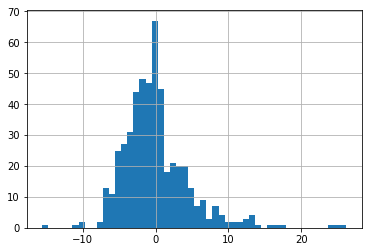

In [6]:
import numpy as np
import pandas as pd
np.random.seed(10)

import matplotlib.pyplot as plt

#within an IPython Notebook

%matplotlib inline

pd.Series(boston.target - predictions).hist(bins=50)

In [7]:
lr.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [8]:
lr.intercept_

36.4911032803612

In [9]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [10]:
lr2 = LinearRegression(normalize=True)
lr2.fit(boston.data, boston.target)
LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
predictions2 = lr2.predict(boston.data)

In [11]:
from sklearn import datasets
boston = datasets.load_boston()

### Fitting a line through data with ML

In [12]:
from sklearn import datasets
boston = datasets.load_boston()

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(boston.data, boston.target)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
from sklearn.model_selection import cross_val_predict

predictions_cv = cross_val_predict(lr, boston.data, boston.target, cv=10)

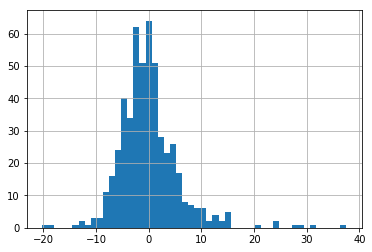

In [15]:
import numpy as np
import pandas as pd
np.random.seed(10)

import matplotlib.pyplot as plt

#within an IPython Notebook

%matplotlib inline

pd.Series(boston.target - predictions_cv).hist(bins=50)

## Evaluating the linear regresion model

In [16]:
import numpy as np
import pandas as pd
np.random.seed(10)

import matplotlib.pyplot as plt

%matplotlib inline

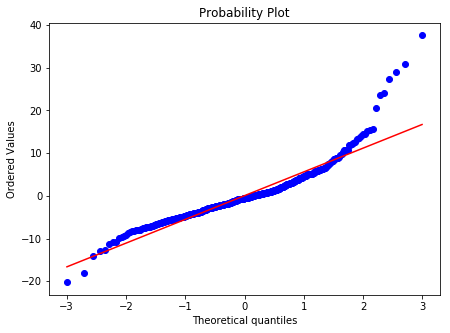

In [17]:
from scipy.stats import probplot

f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(boston.target - predictions_cv, plot=ax)

In [18]:
tuple_out[1]

(5.556070735566738, 0.03349131958603706, 0.9398635242102846)

In [19]:
def MSE(target, predictions):
    squared_deviation = np.power(target - predictions, 2)
    return np.mean(squared_deviation)

MSE(boston.target, predictions)

21.897779217687496

In [20]:
def MAD(target, predictions):
    absolute_deviation = np.abs(target - predictions)
    return np.mean(absolute_deviation)

MAD(boston.target, predictions)

3.2729446379969342

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE: ', mean_absolute_error(boston.target, predictions))
print('MSE: ', mean_squared_error(boston.target, predictions))

MAE:  3.2729446379969342
MSE:  21.897779217687496


In [22]:
n_bootstraps = 1000
len_boston = len(boston.target)
subsample_size = np.int(0.5*len_boston)

subsample = lambda : np.random.choice(np.arange(0, len_boston), size=subsample_size)
coefs = np.ones(n_bootstraps) #pre-allocate the space for the coefs
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_Y = boston.target[subsample_idx]
    lr.fit(subsample_X, subsample_Y)
    coefs[i] = lr.coef_[0]

Text(0.5, 1.0, 'Histogram of the lr.coef_[0].')

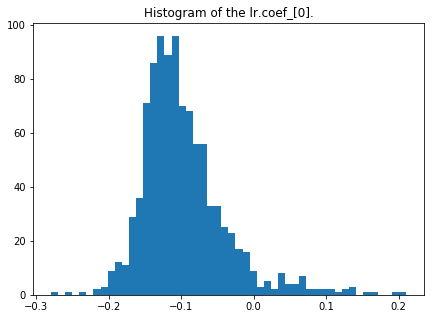

In [23]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histogram of the lr.coef_[0].")

In [24]:
np.percentile(coefs, [2.5, 97.5])

array([-0.18358757,  0.06131815])

## Using ridge regression to overcome linear regression's shortfalls

In [25]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

In [26]:
import numpy as np
np.random.seed(10)

n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.5*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

coefs = np.ones((n_bootstraps, 3))

for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_Y = reg_target[subsample_idx]
    lr.fit(subsample_X, subsample_Y)
    coefs[i][0] = lr.coef_[0]
    coefs[i][1] = lr.coef_[1]
    coefs[i][2] = lr.coef_[2]

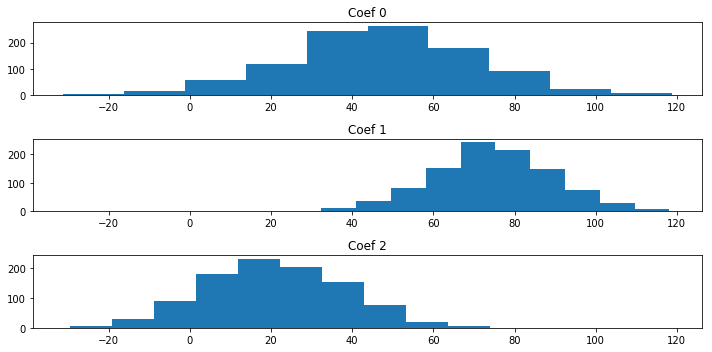

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
bx = None

for i in range(0,3):
    if bx is None:
        ax = plt.subplot(311+i, title=('Coef %d' % i))
    else:
        ax = plt.subplot(311+i, sharex=bx, title=('Coef %d' % i))
    ax.hist(coefs[:,0+i])
    bx = ax
    
plt.tight_layout()

In [28]:
from sklearn.linear_model import Ridge

r = Ridge()
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.5*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

coefs_r = np.ones((n_bootstraps, 3))

for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    r.fit(subsample_X, subsample_y)
    coefs_r[i][0] = r.coef_[0]
    coefs_r[i][1] = r.coef_[1]
    coefs_r[i][2] = r.coef_[2]

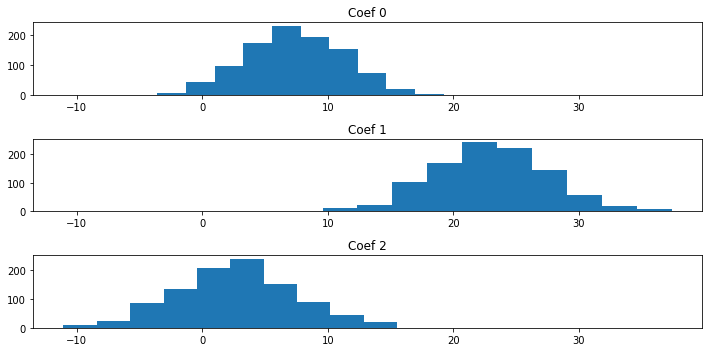

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
bx = None

for i in range(0,3):
    if bx is None:
        ax = plt.subplot(311+i, title=('Coef %d' % i))
    else:
        ax = plt.subplot(311+i, sharex=bx, title=('Coef %d' % i))
    ax.hist(coefs_r[:,0+i])
    bx = ax
    
plt.tight_layout()

In [30]:
np.var(coefs, axis=0)

array([508.17253141, 213.76882881, 287.88563922])

In [31]:
np.var(coefs_r, axis=0)

array([14.7481923 , 20.15015461, 21.89680319])

## Optimizing the ridge regression parameter

In [32]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=100, n_features=2, effective_rank=1, noise=10)

In [33]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [34]:
rcv.alpha_

0.2

In [35]:
rcv2 = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
rcv2.fit(reg_data, reg_target)

rcv2.alpha_

0.12

In [36]:
alphas_to_test = np.linspace(0.01, 1)
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)
rcv3.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.01   , 0.0302 , 0.05041, 0.07061, 0.09082, 0.11102, 0.13122,
       0.15143, 0.17163, 0.19184, 0.21204, 0.23224, 0.25245, 0.27265,
       0.29286, 0.31306, 0.33327, 0.35347, 0.37367, 0.39388, 0.41408,
       0.43429, 0.45449, 0.47469, 0.4949 , 0.5151 , 0.53531, 0.55551,
       0.5757...816, 0.83837,
       0.85857, 0.87878, 0.89898, 0.91918, 0.93939, 0.95959, 0.9798 ,
       1.     ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [37]:
rcv3.cv_values_.shape

(100, 50)

In [38]:
smallest_idx = rcv3.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.23224489795918368

In [39]:
rcv3.alpha_

0.23224489795918368

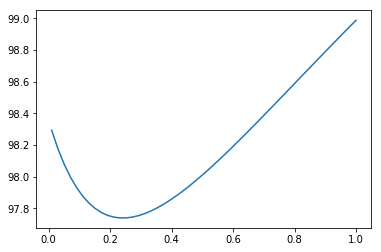

In [40]:
plt.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0))

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
from sklearn.metrics import make_scorer
MAD_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [43]:
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True, scoring=MAD_scorer)
rcv4.fit(reg_data, reg_target)
smallest_idx = rcv4.cv_values_.mean(axis=0).argmin()

In [44]:
rcv4.cv_values_.mean(axis=0)[smallest_idx]

0.016638611440136845

In [45]:
alphas_to_test[smallest_idx]

1.0

### Bayesian ridge regression

In [46]:
X = np.linspace(0, 5)
y_truth = 3 * X
y_noise = np.random.normal(0, 0.5, len(y_truth)) #normally distributed noise with mean 0 and spread 0.1
y_noisy = (y_truth + y_noise)

In [47]:
from sklearn.linear_model import BayesianRidge

br_inst = BayesianRidge().fit(X.reshape(-1, 1), y_noisy)

In [48]:
y_pred, y_err = br_inst.predict(X.reshape(-1, 1), return_std=True)

<ErrorbarContainer object of 3 artists>

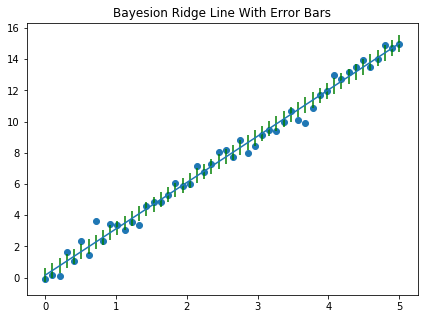

In [49]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y_noisy)
plt.title("Bayesion Ridge Line With Error Bars")
plt.errorbar(X, y_pred, y_err, ecolor='green')

## Using sparsity to regularize models

In [50]:
import numpy as np
np.random.seed(10)

from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200, n_features=500, n_informative=5, noise=5)

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [52]:
lasso.fit(reg_data, reg_target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
np.sum(lasso.coef_ != 0)

10

In [54]:
lasso_0 = Lasso(0)
lasso_0.fit(reg_data, reg_target)
np.sum(lasso_0.coef_ != 0)

/home/mayuri/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/mayuri/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


500

### LASSO cross-validation - LASSOCV

In [55]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(reg_data, reg_target)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [56]:
lassocv.alpha_

0.5306155251972855

In [57]:
lassocv.coef_[:5]

array([-0.        ,  0.        ,  0.03193689,  0.        ,  0.        ])

In [58]:
np.sum(lassocv.coef_ != 0)

40

In [59]:
mask = lassocv.coef_ != 0
new_reg_data = reg_data[:, mask]
new_reg_data.shape

(200, 40)

## Taking a more fundamental approach to regularization with LARS

In [60]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200, n_features=500, n_informative=10, noise=2)

In [61]:
import numpy as np
np.random.seed(10)

from sklearn.linear_model import Lars
lars = Lars(n_nonzero_coefs=10)
lars.fit(reg_data, reg_target)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=10, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [62]:
np.sum(lars.coef_ != 0)

10

In [63]:
train_n = 100
lars_12 = Lars(n_nonzero_coefs=12)
lars_12.fit(reg_data[:train_n], reg_target[:train_n])
lars_500 = Lars()
lars_500.fit(reg_data[:train_n], reg_target[:train_n])

np.mean(np.power(reg_target[train_n:] - lars_12.predict(reg_data[train_n:]), 2))

123.97145816405202

In [64]:
np.mean(np.power(reg_target[train_n:] - lars_500.predict(reg_data[train_n:]), 2))

2.1856449698702015e+28

In [65]:
from sklearn.linear_model import LarsCV
lcv = LarsCV()
lcv.fit(reg_data, reg_target)

/home/mayuri/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 176 iterations, i.e. alpha=4.952e-02, with an active set of 133 regressors, and the smallest cholesky pivot element being 7.451e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mayuri/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 176 iterations, i.e. alpha=4.611e-02, with an active set of 133 regressors, and the smallest cholesky pivot element being 8.689e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/mayuri/.local/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 176 iterations, i.e. alpha=4.602e-02, with an active set of 133 regressors, and 

LarsCV(copy_X=True, cv=None, eps=2.220446049250313e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    positive=False, precompute='auto', verbose=False)

In [66]:
np.sum(lcv.coef_ != 0)

28